In [4]:
import torch
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#80% goes to the training 20% goes to testing

# Normalize the features purpose :ensures each feature contributes equally to the result.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
# Define the function to calculate Euclidean distance
def euclidean_distance(X_train, X_test_point):
    # Subtract the test point from each training point and compute the squared distances
    distances = torch.sum((X_train - X_test_point) ** 2, axis=1)
    return torch.sqrt(distances)


# Define the KNN classifier function
def knn(X_train, y_train, X_test, K):
    y_pred = []

    for X_test_point in X_test:
        # Compute distances from the test point to all training points
        distances = euclidean_distance(X_train, X_test_point)

        # Get the indices of the K nearest neighbors
        nearest_neighbors = torch.argsort(distances)[:K]

        # Get the labels of the K nearest neighbors
        nearest_labels = y_train[nearest_neighbors]

        # Perform a majority vote to predict the label
        predicted_label = torch.mode(nearest_labels).values.item()
        y_pred.append(predicted_label)

    return torch.tensor(y_pred)


# Set the value of K .How many neighbors to consider when making a prediction for each test point.
K = 5

# Make predictions on the test set
y_pred = knn(X_train, y_train, X_test, K)

# Evaluate the accuracy
accuracy = torch.sum(y_pred == y_test).item() / len(y_test)
print(f"KNN Model Accuracy: {accuracy * 100:.2f}%")



KNN Model Accuracy: 100.00%


/tmp/ipython-input-9-681680474.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


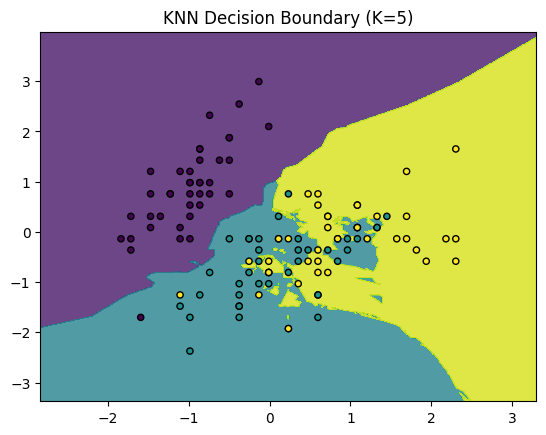

In [9]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X_train, y_train, K):
    # Create a mesh grid
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Flatten the grid and make predictions
    grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    Z = knn(X_train[:, :2], y_train, grid_points, K)
    Z = Z.numpy().reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
    plt.title(f"KNN Decision Boundary (K={K})")
    plt.show()

# Plot decision boundary using the first two features of the Iris dataset
plot_decision_boundary(X_train[:, :2], y_train, K=5)